Creating graphics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
big_df_fee = pd.read_csv("big_df_fee.csv")

In [3]:
big_df_fee.head()

,status,closing_reason,closing_date,capacity,short_id,id,fee_rate,node,closing_tx,total_fee
0,2,2,1676821543,25000000,729982x1884x0,802623697190649856,100,Kraken,e3dc1730e89cc58ff59da0a4068d060395fe3001687732...,12100
1,2,2,1676815320,10000000,733382x704x1,806362036647755777,2500,Kraken,fe7a233227bd7d2e739f4c9c2a2af7e000048e308b2224...,2063
2,2,1,1676811681,30303333,777044x633x1,854368913335058433,100,Kraken,e4eef656eb65812396c0b0113650fcd49f2373e35470f0...,222
3,2,1,1676810931,30303333,776361x1432x0,853617946945650688,100,Kraken,97230c200eb8f8a1e7d5af8b2eb03e3855f0ed60da5487...,567
4,2,1,1676798703,6000000,766618x2498x0,842905405226090496,100,Kraken,6eb61543b82311b3d153af8efc77be3aa361d80d23aa11...,196


In [4]:
big_df_fee.describe()

,status,closing_reason,closing_date,capacity,id,fee_rate,total_fee
count,27543.0,27543.000000,2.754300e+04,2.754300e+04,2.754300e+04,27543.000000,2.754300e+04
mean,2.0,1.348364,1.644191e+09,1.604848e+07,7.732691e+17,288.322006,5.752826e+03
std,0.0,0.476766,3.117209e+07,4.439998e+07,6.573657e+16,10514.159987,2.226897e+04
min,2.0,1.000000,1.548001e+09,2.000000e+04,5.681836e+17,0.000000,1.380000e+02
25%,2.0,1.000000,1.629531e+09,1.000000e+06,7.486311e+17,0.000000,4.230000e+02
50%,2.0,1.000000,1.654493e+09,3.000000e+06,7.916055e+17,0.000000,1.513000e+03
75%,2.0,2.000000,1.667716e+09,1.111126e+07,8.284259e+17,2.000000,4.994500e+03
max,2.0,3.000000,1.676886e+09,1.000000e+09,8.547208e+17,1000000.000000,2.434524e+06


In [5]:
force_closed = big_df_fee[big_df_fee['closing_reason'].isin([2,3])]
coop_closed = big_df_fee[big_df_fee['closing_reason']==1]

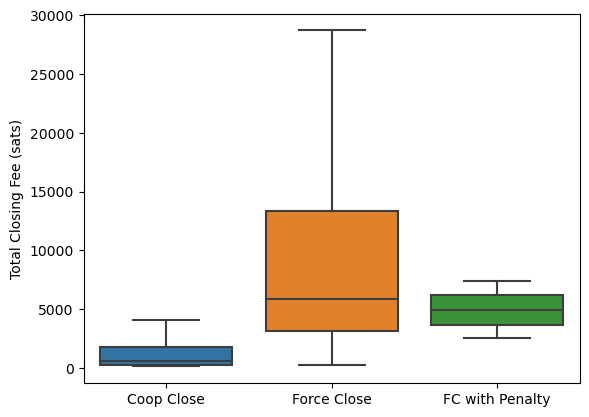

In [6]:
ax = sns.boxplot(data=big_df_fee,x='closing_reason',y='total_fee', showfliers=False)
plt.xlabel("")
plt.ylabel("Total Closing Fee (sats)")
ax.set_xticks(range(3), labels=["Coop Close", "Force Close", "FC with Penalty"])
#plt.savefig("closing_cost_by_type.png",bbox_inches='tight')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Kraken'),
  Text(1, 0, 'ACINQ'),
  Text(2, 0, 'C-Otto'),
  Text(3, 0, 'Deezy'),
  Text(4, 0, 'BCash_Is_Trash'),
  Text(5, 0, 'Wallet_Of_Satoshi'),
  Text(6, 0, 'Boltz')])

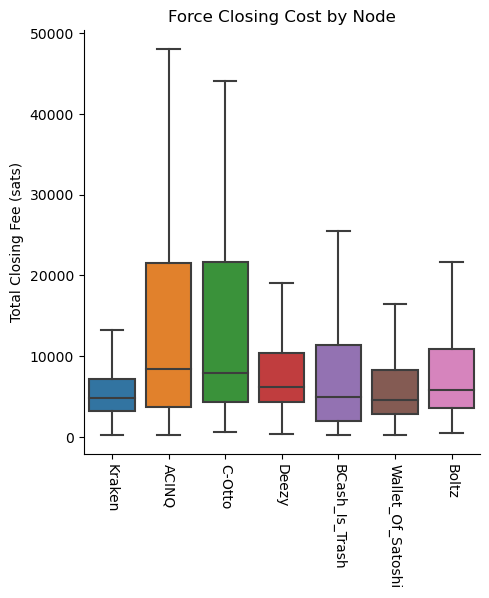

In [8]:
g = sns.catplot(data=force_closed,x='node',y='total_fee', kind='box',showfliers=False)
plt.xlabel("")
plt.ylabel("Total Closing Fee (sats)")
plt.title("Force Closing Cost by Node")
plt.xticks(rotation=-90)
#plt.savefig("force_closing_cost_by_node.png",bbox_inches='tight')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Kraken'),
  Text(1, 0, 'ACINQ'),
  Text(2, 0, 'C-Otto'),
  Text(3, 0, 'Deezy'),
  Text(4, 0, 'BCash_Is_Trash'),
  Text(5, 0, 'Wallet_Of_Satoshi'),
  Text(6, 0, 'Boltz')])

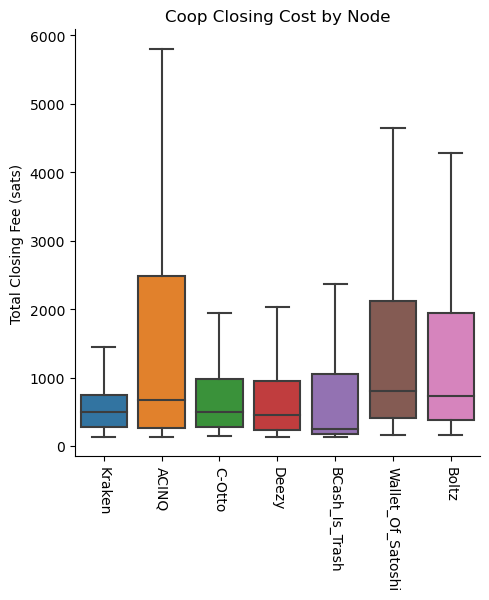

In [9]:
g = sns.catplot(data=coop_closed,x='node',y='total_fee', kind='box',showfliers=False)
plt.xlabel("")
plt.ylabel("Total Closing Fee (sats)")
plt.title("Coop Closing Cost by Node")
plt.xticks(rotation=-90)
#plt.savefig("coop_closing_cost_by_node.png",bbox_inches='tight')

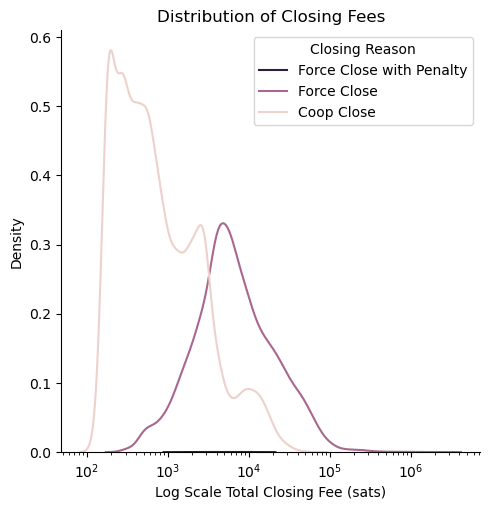

In [27]:
ax = sns.displot(data=big_df_fee,x='total_fee',kind='kde', log_scale=True, hue='closing_reason',legend=False)
plt.xlabel("Log Scale Total Closing Fee (sats)")
plt.title("Distribution of Closing Fees")
plt.legend(title='Closing Reason',labels=['Force Close with Penalty', 'Force Close', 'Coop Close'])
#plt.savefig("distribution_of_closing_fees_by_type.png",bbox_inches='tight')

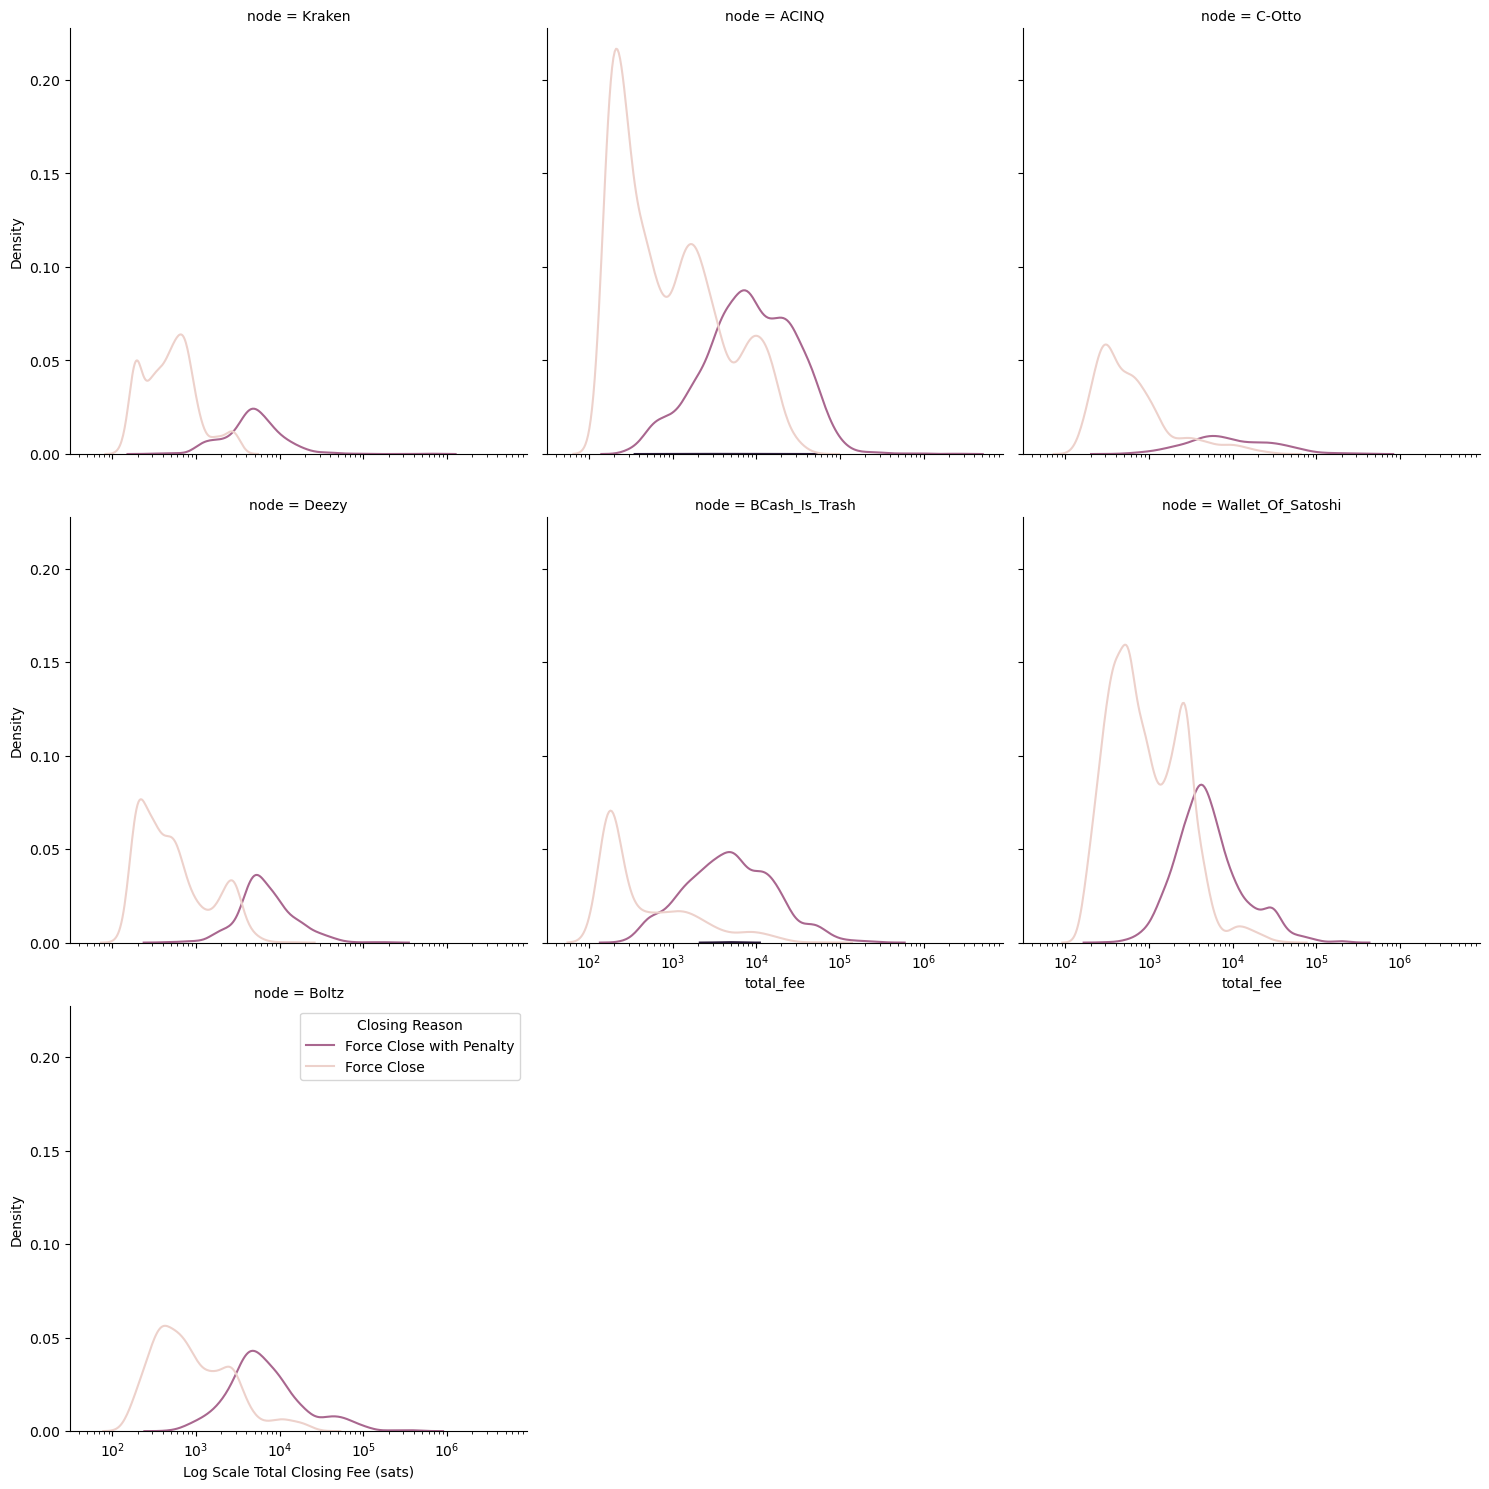

In [28]:
g = sns.displot(data=big_df_fee,x='total_fee', kind='kde', log_scale=True, hue='closing_reason',legend=False, col = 'node',col_wrap = 3)
plt.xlabel("Log Scale Total Closing Fee (sats)")
plt.legend(title='Closing Reason',labels=['Force Close with Penalty', 'Force Close', 'Coop Close'])
#plt.savefig("distribution_of_closing_fees_by_type_by_channel.png",bbox_inches='tight')